<a href="https://colab.research.google.com/github/jcmachicao/deep_learning_2025_curso/blob/main/S03__mercadopapa_nosup_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BD Papa Variedades: Reducción Dimensional y Densidad Máxima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Preparación de data

In [ ]:
!pip install plotly_express

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
ruta = ''
data = pd.read_excel(ruta + 'df_base2.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27038 entries, 0 to 27037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   variedad   27038 non-null  object 
 1   year       27038 non-null  int64  
 2   provincia  27038 non-null  object 
 3   mes        27038 non-null  object 
 4   volumen    27038 non-null  float64
 5   precio     27038 non-null  float64
 6   ym         27038 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data['year'] = data.year.astype('category')

In [ ]:
data.variedad = data.variedad.str.replace('Papa ', '')

## 2. Transformación y Reducción Dimensional (PCA)

In [ ]:
data_dum = pd.get_dummies(data)
data_dum.shape

(27038, 360)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data_dum)
X_n = mms.transform(data_dum)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_model = PCA(n_components=2, svd_solver='full')

In [ ]:
pca_model.fit(X_n)

PCA(n_components=2, svd_solver='full')

In [ ]:
vectores = pd.DataFrame(pca_model.transform(X_n))
vectores.columns = ['col_1', 'col_2']
vectores.head()

,col_1,col_2
0,-0.025254,0.635788
1,-0.028773,0.636246
2,-0.026278,0.580329
3,-0.025695,0.584475
4,-0.028148,0.641915


## 3. Integración

In [ ]:
data['v1'] = vectores.col_1
data['v2'] = vectores.col_2
#data['v3'] = vectores.col_3
data

,variedad,year,provincia,mes,volumen,precio,ym,v1,v2
0,Amarilla,1997,Ambo,m_01,97.8,0.90,1997m_01,-0.025254,0.635788
1,Amarilla,1997,Andahuaylas,m_01,0.0,0.90,1997m_01,-0.028773,0.636246
2,Amarilla,1997,Arequipa,m_01,0.0,0.90,1997m_01,-0.026278,0.580329
3,Amarilla,1997,Canete,m_01,0.0,0.90,1997m_01,-0.025695,0.584475
4,Amarilla,1997,Huamanga,m_01,0.0,0.90,1997m_01,-0.028148,0.641915
...,...,...,...,...,...,...,...,...,...
27033,Yungay,2020,Lima,m_12,72.0,0.64,2020m_12,-0.007794,0.191968
27034,Yungay,2020,Nazca,m_12,0.0,0.64,2020m_12,-0.008749,0.163667
27035,Yungay,2020,Pasco,m_12,178.0,0.64,2020m_12,-0.010788,0.231242
27036,Yungay,2020,Tarma,m_12,647.0,0.64,2020m_12,-0.009066,0.230393


In [ ]:
import plotly_express as px

In [ ]:
data.columns

Index(['variedad', 'year', 'provincia', 'mes', 'volumen', 'precio', 'ym', 'v1',
       'v2'],
      dtype='object')

## 4. Visualización

In [ ]:
px.scatter(data, x='v1', y='v2', color='variedad',
           width=600, height=500)

### Caracterización del diagrama:  <br>
Este diagrama tiene zonas muy definidas para determinadas variedades de papa (Amarilla, Blanca, Color) <br>
Si se enfoca en el área que tiene los valores superpuestos sería más interesante encontrar algunos valores  <br>
Se puede filtrar la data por zona o por variedades.

In [ ]:
px.scatter(data, x='v1', y='v2', color='variedad',
           facet_col='variedad',
           width=1600, height=400)

In [ ]:
data_minivar = data[~data.variedad.isin(['Blanca', 'Color', 'Amarilla'])]

In [ ]:
px.scatter(data_minivar, x='v1', y='v2', color='mes',
           width=600, height=500)

In [ ]:
px.scatter(data_minivar, x='v1', y='v2', color='mes',
           facet_col='mes',
           width=1600, height=400)

## Composición de DF para altitudes Sierra Costa

In [ ]:
altitudes = [2500, 2896, 2335, 27, 2746, 3680, 3271, 1915, 3400, 4175, 500, 4380, 3050, 3356, 65, 120, 83, 406, 588]

In [ ]:
alt_prov = pd.DataFrame([data.provincia.unique(), altitudes]).T
alt_prov.columns = ['provincia', 'alt']

In [ ]:
alt_prov['regnat'] = ['Sierra' if x > 1800 else 'Costa' for x in alt_prov.alt]

In [ ]:
alt_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   provincia  19 non-null     object
 1   alt        19 non-null     object
 2   regnat     19 non-null     object
dtypes: object(3)
memory usage: 584.0+ bytes


## Integracion

In [ ]:
data2 = pd.merge(data_minivar, alt_prov, on='provincia')
data2.to_excel(ruta + 'recorte_minivar.xlsx')
data2

,variedad,year,provincia,mes,volumen,precio,ym,v1,v2,alt,regnat
0,Huayro,1997,Ambo,m_01,0.0,0.82,1997m_01,-0.010231,0.208421,2500,Sierra
1,Huayro,2006,Ambo,m_01,0.0,0.71,2006m_01,-0.009329,0.196285,2500,Sierra
2,Huayro,2007,Ambo,m_01,0.0,0.73,2007m_01,-0.009282,0.193486,2500,Sierra
3,Huayro,2008,Ambo,m_01,0.0,1.05,2008m_01,-0.011847,0.226178,2500,Sierra
4,Peruanita,2008,Ambo,m_01,0.0,1.19,2008m_01,-0.009727,0.177075,2500,Sierra
...,...,...,...,...,...,...,...,...,...,...,...
12155,Yungay,2019,Lima,m_12,127.0,1.28,2019m_12,-0.016075,0.266902,500,Costa
12156,Canchan,2020,Lima,m_12,7.0,0.56,2020m_12,-0.007054,0.168864,500,Costa
12157,Huayro,2020,Lima,m_12,0.0,1.74,2020m_12,-0.015774,0.277062,500,Costa
12158,Unica,2020,Lima,m_12,47.0,0.44,2020m_12,-0.005763,0.150075,500,Costa


In [ ]:
px.scatter(data2, x='v1', y='v2', color='regnat',
           width=600, height=500)

(8715, 11) (3445, 11)


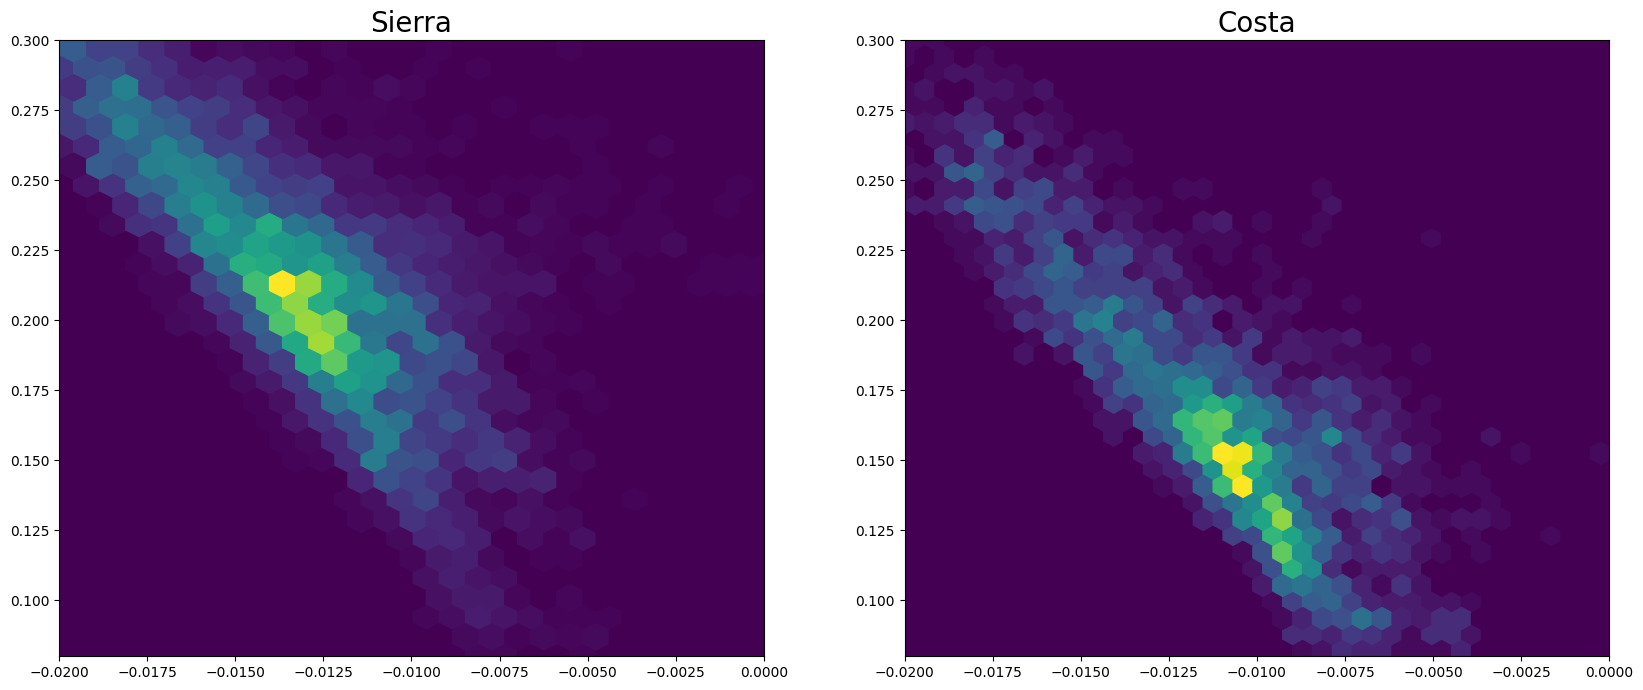

In [ ]:
fx, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

dfZ1 = data2[data2['regnat']=='Sierra']
dfZ2 = data2[data2['regnat']=='Costa']

print(dfZ1.shape, dfZ2.shape)

plt.rcParams['axes.grid'] = True

ax1.hexbin(x=dfZ1.v1, y=dfZ1.v2, gridsize=50)
ax1.set_title('Sierra', fontsize=20)
ax1.set_xlim(-0.02, 0.0)
ax1.set_ylim(0.08, 0.3)

ax2.hexbin(x=dfZ2.v1, y=dfZ2.v2, gridsize=50)
ax2.set_title('Costa', fontsize=20)
ax2.set_xlim(-0.02, 0.0)
ax2.set_ylim(0.08, 0.3)

plt.show()

In [ ]:
a1 = pd.DataFrame()
fig1 = ax1.hexbin(x=dfZ1.v1, y=dfZ1.v2, gridsize=50)
a1 = pd.DataFrame(fig1.get_offsets())
a1.columns = ['vv1', 'vv2']
print(a1)
a2 = pd.DataFrame(fig1.get_array())
a1['a3'] = a2
print(a1.a3.max())
print(a1.shape)
lista_a = a1[a1.a3 > a1.a3.max()*0.85].reset_index()
lista_a

           vv1       vv2
0    -0.029603  0.037901
1    -0.029603  0.051908
2    -0.029603  0.065916
3    -0.029603  0.079924
4    -0.029603  0.093932
...        ...       ...
2874  0.007109  0.367088
2875  0.007109  0.381096
2876  0.007109  0.395104
2877  0.007109  0.409112
2878  0.007109  0.423120

[2879 rows x 2 columns]
117.0
(2879, 3)


,index,vv1,vv2,a3
0,678,-0.012545,0.191988,101.0
1,2079,-0.013657,0.213000,117.0


In [ ]:
fig2 = ax2.hexbin(x=dfZ2.v1, y=dfZ2.v2, gridsize=50)
b1 = pd.DataFrame(fig2.get_offsets())
b1.columns = ['vv1', 'vv2']
print(b1)
b2 = pd.DataFrame(fig2.get_array())
b1['b3'] = b2
print(b1.b3.max())
b1.shape

           vv1       vv2
0    -0.026479  0.040389
1    -0.026479  0.052190
2    -0.026479  0.063991
3    -0.026479  0.075792
4    -0.026479  0.087593
...        ...       ...
2874  0.001453  0.317711
2875  0.001453  0.329512
2876  0.001453  0.341313
2877  0.001453  0.353114
2878  0.001453  0.364915

[2879 rows x 2 columns]
41.0


(2879, 3)

In [ ]:
lista_b = b1[b1.b3 > b1.b3.max()*0.85].reset_index()
lista_b

,index,vv1,vv2,b3
0,821,-0.010679,0.146597,39.0
1,2244,-0.010962,0.152498,41.0
2,2271,-0.010397,0.140697,41.0
3,2272,-0.010397,0.152498,40.0


In [ ]:
df = dfZ1
target_extracto__Sierra_01 = df[(df.v1 > lista_a.vv1[0] - 0.0001) & (df.v1 < lista_a.vv1[0] + 0.0001)]
target_extracto__Sierra_02 = df[(df.v1 > lista_a.vv1[1] - 0.0001) & (df.v1 < lista_a.vv1[1] + 0.0001)]
target_Sierra = pd.concat([target_extracto__Sierra_01, target_extracto__Sierra_02], axis=0, ignore_index=True)
target_Sierra

,variedad,year,provincia,mes,volumen,precio,ym,v1,v2,alt,regnat
0,Perricholi,2017,Ambo,m_01,0.0,1.29,2017m_01,-0.012538,0.222372,2500,Sierra
1,Huayro,2011,Ambo,m_02,21.0,1.19,2011m_02,-0.012643,0.236693,2500,Sierra
2,Unica,2017,Ambo,m_02,0.0,1.16,2017m_02,-0.012628,0.235720,2500,Sierra
3,Yungay,2016,Ambo,m_05,0.0,0.70,2016m_05,-0.012458,0.261969,2500,Sierra
4,Canchan,2015,Ambo,m_07,0.0,0.92,2015m_07,-0.012536,0.228913,2500,Sierra
...,...,...,...,...,...,...,...,...,...,...,...
381,Canchan,2015,Arequipa,m_08,22.0,0.99,2015m_08,-0.013657,0.179448,2335,Sierra
382,Perricholi,2013,Arequipa,m_09,0.0,1.23,2013m_09,-0.013569,0.159769,2335,Sierra
383,Canchan,2013,Arequipa,m_10,0.0,1.04,2013m_10,-0.013632,0.178250,2335,Sierra
384,Yungay,2018,Arequipa,m_10,269.0,1.04,2018m_10,-0.013662,0.206441,2335,Sierra


In [ ]:
px.parallel_categories(target_Sierra.drop(['regnat', 'alt'], axis=1),
                      width=900, height=500)

In [ ]:
df = dfZ2 # Costa
target_extracto__Costa_01 = df[(df.v1 > lista_b.vv1[0] - 0.0001) & (df.v1 < lista_b.vv1[0] + 0.0001)]
target_extracto__Costa_02 = df[(df.v1 > lista_b.vv1[1] - 0.0001) & (df.v1 < lista_b.vv1[1] + 0.0001)]
target_Costa = pd.concat([target_extracto__Costa_01, target_extracto__Costa_02], axis=0, ignore_index=True)
target_Costa

,variedad,year,provincia,mes,volumen,precio,ym,v1,v2,alt,regnat
0,Yungay,2013,Ica,m_01,0.0,0.68,2013m_01,-0.010624,0.176319,406,Costa
1,Yungay,2017,Ica,m_02,0.0,0.67,2017m_02,-0.010652,0.179416,406,Costa
2,Unica,2017,Ica,m_03,0.0,0.92,2017m_03,-0.010766,0.162457,406,Costa
3,Yungay,2018,Ica,m_04,0.0,0.74,2018m_04,-0.010759,0.181311,406,Costa
4,Canchan,2015,Ica,m_05,0.0,0.81,2015m_05,-0.010580,0.161119,406,Costa
...,...,...,...,...,...,...,...,...,...,...,...
158,Canchan,2017,Lima,m_07,13.0,0.77,2017m_07,-0.011025,0.184741,500,Costa
159,Unica,2018,Lima,m_07,0.0,0.77,2018m_07,-0.010944,0.178759,500,Costa
160,Canchan,2017,Lima,m_08,11.0,0.74,2017m_08,-0.010981,0.184706,500,Costa
161,Canchan,2017,Lima,m_09,47.0,0.70,2017m_09,-0.010968,0.188328,500,Costa


In [ ]:
px.parallel_categories(target_Costa.drop(['regnat', 'alt', 'volumen', 'precio'], axis=1),
                      width=900, height=500)

In [ ]:
target_Costa.to_excel(ruta + 'target_costa.xlsx')
target_Sierra.to_excel(ruta + 'target_sierra.xlsx')